In [ ]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

import matplotlib.pyplot as plt

RANDOM_STATE = 987

In [ ]:
data = load_breast_cancer()
print(type(data))

<class 'sklearn.utils.Bunch'>


In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = pd.Series(data.target, name='malignant_or_benign')
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=RANDOM_STATE)
N, D= Xtrain.shape

In [ ]:
scaler = StandardScaler()
Xtrainstd = scaler.fit_transform(Xtrain)
Xteststd = scaler.transform(Xtest)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(D,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

fit_info = model.fit(x=Xtrainstd, y=Ytrain, validation_data=(Xteststd, Ytest), epochs=300)

score_train = model.evaluate(Xtrainstd, Ytrain);
score_test = model.evaluate(Xteststd, Ytest);
print('Train accuracy:', score_train)
print('Test accuracy:', score_test)

Epoch 1/300
12/12 [==============================] - 1s 27ms/step - loss: 1.2714 - accuracy: 0.3228 - val_loss: 1.2769 - val_accuracy: 0.3511
Epoch 2/300
12/12 [==============================] - 0s 7ms/step - loss: 1.1559 - accuracy: 0.3648 - val_loss: 1.1567 - val_accuracy: 0.3617
Epoch 3/300
12/12 [==============================] - 0s 10ms/step - loss: 1.0455 - accuracy: 0.4121 - val_loss: 1.0474 - val_accuracy: 0.3989
Epoch 4/300
12/12 [==============================] - 0s 7ms/step - loss: 0.9448 - accuracy: 0.4436 - val_loss: 0.9469 - val_accuracy: 0.4574
Epoch 5/300
12/12 [==============================] - 0s 9ms/step - loss: 0.8511 - accuracy: 0.4672 - val_loss: 0.8576 - val_accuracy: 0.4947
Epoch 6/300
12/12 [==============================] - 0s 7ms/step - loss: 0.7711 - accuracy: 0.5118 - val_loss: 0.7754 - val_accuracy: 0.5319
Epoch 7/300
12/12 [==============================] - 0s 7ms/step - loss: 0.6982 - accuracy: 0.5774 - val_loss: 0.7032 - val_accuracy: 0.5798
Epoch 8/300

In [ ]:
fit_info.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

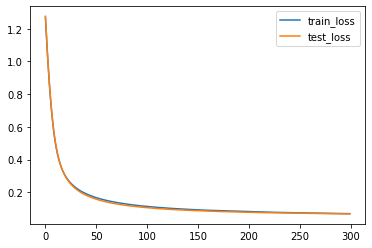

In [ ]:
plt.plot(fit_info.history['loss'], label='train_loss');
plt.plot(fit_info.history['val_loss'], label='test_loss');
plt.legend();

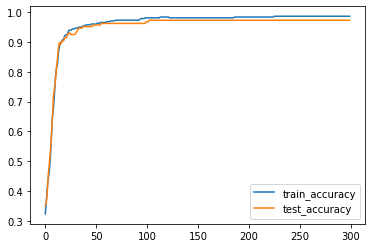

In [ ]:
plt.plot(fit_info.history['accuracy'], label='train_accuracy');
plt.plot(fit_info.history['val_accuracy'], label='test_accuracy');
plt.legend();